<a href="https://colab.research.google.com/github/rajvinder-kaur/AI_ML/blob/master/correctednetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo para 3 parámetros, dataset grande

##Librerías

In [4]:
import sys
import os
import matplotlib.pyplot as plt # for plotting
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!git clone https://github.com/rajvinder-kaur/Neural-Networks-nanophotonics

Cloning into 'Neural-Networks-nanophotonics'...
remote: Enumerating objects: 238, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 238 (delta 12), reused 14 (delta 6), pack-reused 214
Receiving objects: 100% (238/238), 2.70 MiB | 13.36 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [7]:
sys.path.insert(0,'/content/tut')

In [8]:
#Librerias de GitHub
import main as mn
import paint as pt

##Importar datos

In [9]:
InPath = '/content/tut/data/Input_all_clean.txt'
OutPath = '/content/tut/data/Output_all_clean.txt'
FrecPath = '/content/tut/data/Frequencies.txt'

l,x,y = mn.get_data(FrecPath,InPath,OutPath,clean=False)

#Pasamos los ejes a un rango normal
for i in range(x.shape[0]):
    x[i][0] *= 10e7
    x[i][1] *= 10e7

#Separación
x_train,x_validation,x_test,y_train,y_validation,y_test=mn.split_data_Pablo(x,y)

###Ploteamos algunas

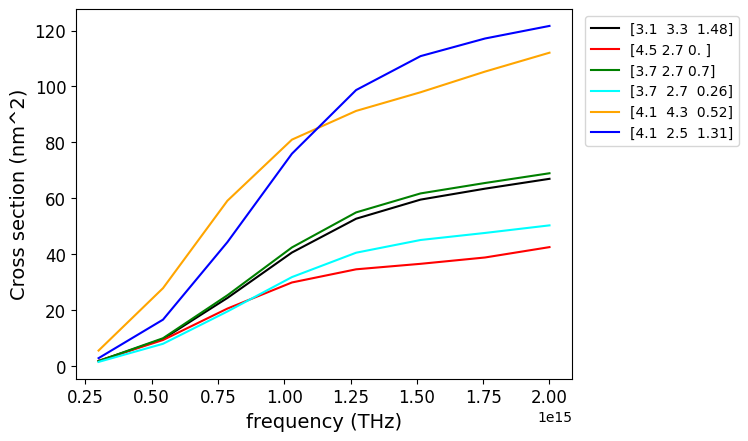

In [10]:
# ES UTIL ANTES DE ENTRAR LA RED PINTAR LAS SECCIONES QUE VAN A SALIR LUEGO EN EL TEST,
# PARA VER SI HA HABIDO SUERTE Y SON DIVERSAS Y TIENEN PINTA DE COMPLICADAS
pt.paint_spectra(l,x_test,y_test)

##Modelo

In [11]:
model,history= mn.train_model_3params(x_train,x_test,y_train,y_test,optimizer='Adam',actfun='relu',lr=5e-4,neurons=100,num_epochs=2000,verb=1,hidden=3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 8)                 808       
                                                                 
Total params: 21408 (83.62 KB)
Trainable params: 21408 (83.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
49/49 [==============================] - 2s 9ms/step - loss: 3187.1741 - mae: 44.0904 - val_loss: 3069.4968 - val_mae: 42.7630
Epoch 2/2000

In [12]:
def paint_predictions(model,l,x,y,save=False,route='',key=''):
    # Predict the spectra
    size = x.shape[0]

    input = np.array([x[0]])
    output1 = model.predict(input)
    input = np.array([x[int(size/5.)]])
    output2 = model.predict(input)
    input = np.array([x[int(size/5.*2)]])
    output3 = model.predict(input)
    input = np.array([x[int(size/5.*3)]])
    output4 = model.predict(input)
    input = np.array([x[int(size/5.*4)]])
    output5 = model.predict(input)
    input = np.array([x[size-1]])
    output6 = model.predict(input)

    plt.clf()

    # Plot the fits
    plt.figure(2)
    plt.plot(l, y[0], color='black', label='datapoint = '+str(x[0])+' a, b, angle')
    plt.plot(l, output1.T, color='black', marker = 'o', label='fit')
    plt.plot(l, y[int(size/5.),:], color='red', label='datapoint = '+str(x[int(size/5.)])+' a, b, angle')
    plt.plot(l, output2.T, color='red', marker = 'o', label='fit')
    plt.plot(l, y[int(size/5.*2),:], color='green', label='datapoint = '+str(x[int(size/5.*2)])+' a, b, angle')
    plt.plot(l, output3.T, color='green', marker = 'o', label='fit')
    plt.plot(l, y[int(size/5.*3),:], color='cyan', label='datapoint = '+str(x[int(size/5.*3)])+' a, b, angle')
    plt.plot(l, output4.T, color='cyan', marker = 'o', label='fit')

    plt.plot(l, y[size-1,:], color='blue', label='datapoint = '+str(x[size-1])+' a, b, angle')
    plt.plot(l, output6.T, color='blue',  marker = 'o', label='fit')

    plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.0))
    plt.xlabel("Frequency [THz]", fontsize=14)
    plt.ylabel("Cross section (nm)", fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    if save:
        plt.savefig(str(route)+'/train'+str(key)+'.pdf')

    plt.show()

##Probar modelo

1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

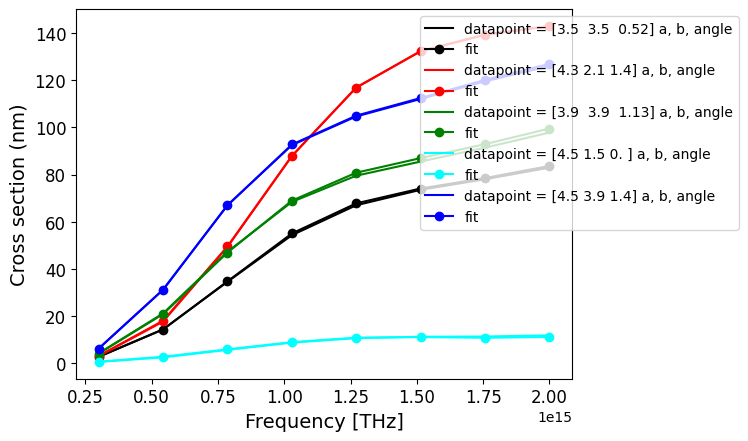

In [13]:
paint_predictions(model,l,x_validation,y_validation)


##Guardar modelo

In [39]:
pathsave = '/content/drive/MyDrive/Colab Notebooks/TFG/Modelos/3params'
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave,key='Adam_relu_5e-4_100n_')

Model saved correctly!


In [40]:
InPath = '/content/tut/data/Input_1param.txt'
OutPath = '/content/tut/data/Output_1param.txt'
FrecPath = '/content/tut/data/Frequencies.txt'

l,x,y = mn.get_data(FrecPath,InPath,OutPath,clean=False)

#Pasamos los ejes a un rango normal
for i in range(x.shape[0]):
    x[i][0] *= 10e7
    x[i][1] *= 10e7

#Separación
x_train,x_validation,x_test,y_train,y_validation,y_test=mn.split_data_Pablo(x,y)

In [41]:
model,history= mn.train_model_3params(x_train,x_test,y_train,y_test,optimizer='Adam',actfun='relu',lr=5e-4,neurons=100,num_epochs=2000,verb=1,hidden=3)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               400       
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 8)                 808       
                                                                 
Total params: 21408 (83.62 KB)
Trainable params: 21408 (83.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 5884.4731 - mae: 59.5022 - val_loss: 7134.3516 - val_mae: 68.9941
Epoch 2/2000


KeyboardInterrupt: 

In [32]:
def paint_predictions(model,l,x,y,save=False,route='',key=''):
    # Predict the spectra
    size = x.shape[0]

    input = np.array([x[0]])
    output1 = model.predict(input)
    input = np.array([x[int(size/5.)]])
    output2 = model.predict(input)
    input = np.array([x[int(size/5.*2)]])
    output3 = model.predict(input)
    input = np.array([x[int(size/5.*3)]])
    output4 = model.predict(input)
    input = np.array([x[int(size/5.*4)]])
    output5 = model.predict(input)
    input = np.array([x[size-1]])
    output6 = model.predict(input)

    plt.clf()

    # Plot the fits
    plt.figure(1)
    plt.plot(l, y[0], color='black', label='angle -'+str(x[0])+' rad')
    plt.plot(l, output1.T, color='black', marker = 'o', label='prediction')
    plt.plot(l, y[int(size/5.),:], color='red', label='angle -'+str(x[int(size/5.)])+' rad')
    plt.plot(l, output2.T, color='red', marker = 'o', label='prediction')
    plt.plot(l, y[int(size/5.*2),:], color='green', label='angle - '+str(x[int(size/5.*2)])+' rad')
    plt.plot(l, output3.T, color='green', marker = 'o', label='prediction')
    plt.plot(l, y[int(size/5.*3),:], color='cyan', label='angle -'+str(x[int(size/5.*3)])+' rad')
    plt.plot(l, output4.T, color='cyan', marker = 'o', label='prediction')

    plt.plot(l, y[size-1,:], color='blue', label='angle -'+str(x[size-1])+'rad')
    plt.plot(l, output6.T, color='blue',  marker = 'o', label='prediction')

    plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.0))
    plt.xlabel("Frequency [THz]", fontsize=14)
    plt.ylabel("Cross section (nm)", fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    if save:
        plt.savefig(str(route)+'/train'+str(key)+'.pdf')

    plt.show()

1/1 [==============================] - 0s 35ms/step


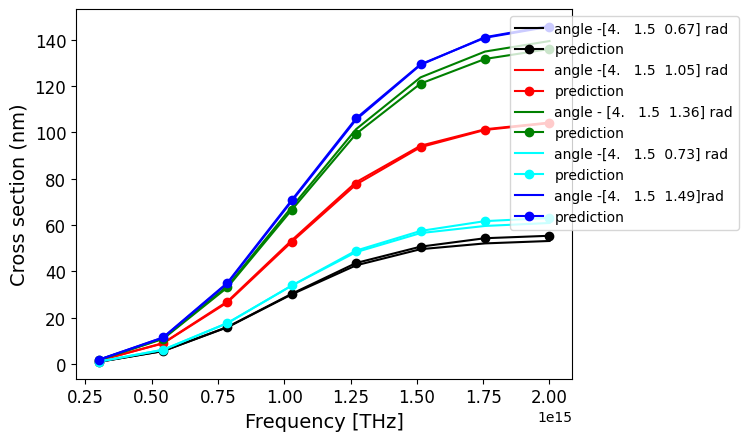

In [33]:
paint_predictions(model,l,x_validation,y_validation)